In [2]:
import pickle 
import os
from datetime import datetime,timezone,timedelta
import pickle

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tqdm import tqdm
from scipy import signal

import data_filter as dafi
import data_process as dapr
import lib_plot

In [3]:
with open('timeseries_ele30_time30.pkl', 'rb') as f:
    ts_30_30_dict = pickle.load(f)

date=[]
median_2=[]
median_3=[]
diff_median=[]

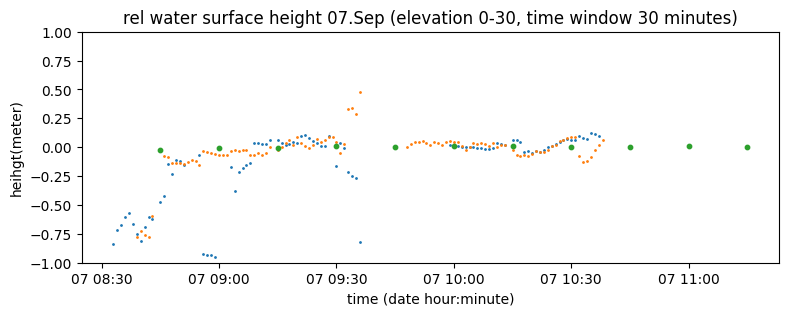

In [4]:
# 0907
ts_0907_2 = ts_30_30_dict['0907_2']
ts_0907_3 = ts_30_30_dict['0907_3']

p_todelete=[]
for item in ts_0907_2:
    if (ts_0907_2[item]==min(list(ts_0907_2.values()))) or (ts_0907_2[item]==max(list(ts_0907_2.values()))):
        p_todelete.append(item)
for item in p_todelete:
    del ts_0907_2[item]

p_todelete=[]
for item in ts_0907_3:
    if (ts_0907_3[item]==min(list(ts_0907_3.values()))) or (ts_0907_3[item]==max(list(ts_0907_3.values()))):
        p_todelete.append(item)
for item in p_todelete:
    del ts_0907_3[item]

ts_gauge = pd.read_csv('../data/gauge/20220907_gauge.csv')

median_ts_2 = np.median(np.array(list(ts_0907_2.values())))
median_ts_3 = np.median(np.array(list(ts_0907_3.values())))

res_ts_0907_2 = -(np.array(list(ts_0907_2.values())) - median_ts_2)
res_ts_0907_3 = -(np.array(list(ts_0907_3.values())) - median_ts_3)

gauge_time = []
gauge_mean = np.mean(ts_gauge['1'])
res_ts_gauge = []
for t,h in zip(ts_gauge['0'],ts_gauge['1']):
    gauge_time.append(datetime.fromtimestamp(t,tz=timezone.utc))
    res_ts_gauge.append(h-gauge_mean)

date.append('0907')
median_2.append(median_ts_2)
median_3.append(median_ts_3)
diff_median.append(median_ts_2-median_ts_3)

plt.rcParams.update({'font.size': 10})
fig,ax = plt.subplots()
ax.scatter(list(ts_0907_2.keys()), res_ts_0907_2,s=1)
ax.scatter(list(ts_0907_3.keys()), res_ts_0907_3,s=1)
ax.scatter(gauge_time,res_ts_gauge,s=10)

ax.set_xlabel('time (date hour:minute)')
ax.set_ylabel('heihgt(meter)')
ax.set_title('rel water surface height 07.Sep (elevation 0-30, time window 30 minutes)')
ax.set_ylim([-1,1])
fig.set_size_inches(9,3)


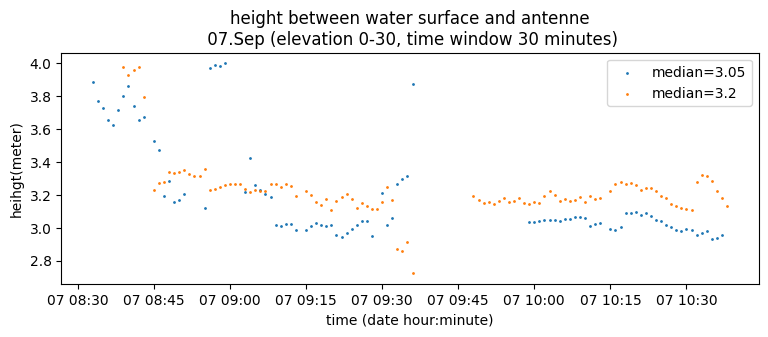

In [5]:
plt.rcParams.update({'font.size': 10})
fig,ax = plt.subplots()
ax.scatter(list(ts_0907_2.keys()), list(ts_0907_2.values()),s=1)
ax.scatter(list(ts_0907_3.keys()), list(ts_0907_3.values()),s=1)

ax.set_xlabel('time (date hour:minute)')
ax.set_ylabel('heihgt(meter)')
ax.set_title('height between water surface and antenne\n 07.Sep (elevation 0-30, time window 30 minutes)')
fig.set_size_inches(9,3)
ax.legend([f'median={round(median_ts_2,2)}',f'median={round(median_ts_3,2)}'])

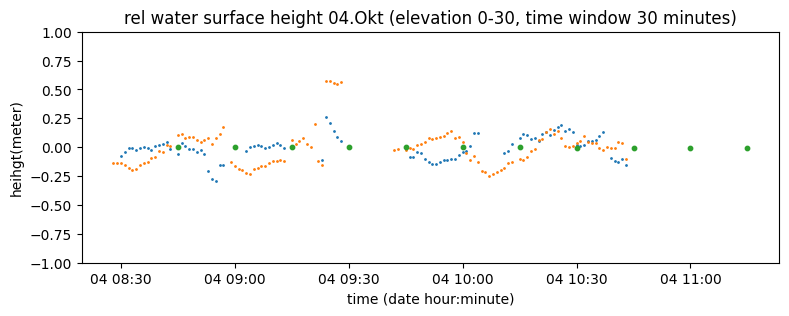

In [6]:
ts_1004_2 = ts_30_30_dict['1004_2']
ts_1004_3 = ts_30_30_dict['1004_3']
ts_gauge = pd.read_csv('../data/gauge/20221004_gauge.csv')

median_ts_2 = np.median(np.array(list(ts_1004_2.values())))
median_ts_3 = np.median(np.array(list(ts_1004_3.values())))

res_ts_1004_2 = -(np.array(list(ts_1004_2.values())) - median_ts_2)
res_ts_1004_3 = -(np.array(list(ts_1004_3.values())) - median_ts_3)

gauge_time = []
gauge_mean = np.mean(ts_gauge['1'])
res_ts_gauge = []
for t,h in zip(ts_gauge['0'],ts_gauge['1']):
    gauge_time.append(datetime.fromtimestamp(t,tz=timezone.utc))
    res_ts_gauge.append(h-gauge_mean)

date.append('1004')
median_2.append(median_ts_2)
median_3.append(median_ts_3)
diff_median.append(median_ts_2-median_ts_3)

plt.rcParams.update({'font.size': 10})
fig,ax = plt.subplots()
ax.scatter(list(ts_1004_2.keys()), res_ts_1004_2,s=1)
ax.scatter(list(ts_1004_3.keys()), res_ts_1004_3,s=1)
ax.scatter(gauge_time,res_ts_gauge,s=10)
ax.set_xlabel('time (date hour:minute)')
ax.set_ylabel('heihgt(meter)')
ax.set_title('rel water surface height 04.Okt (elevation 0-30, time window 30 minutes)')
ax.set_ylim([-1,1])
fig.set_size_inches(9,3)

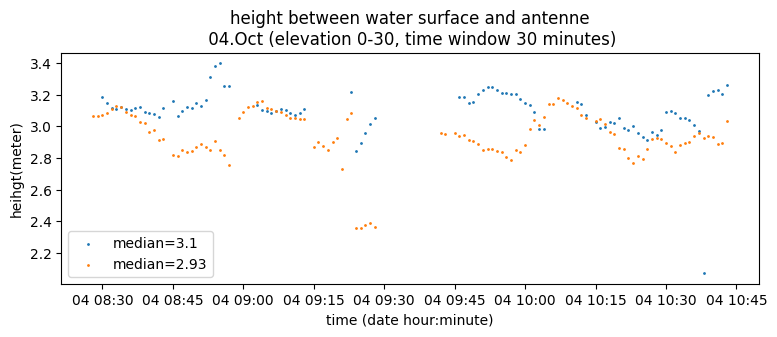

In [7]:
plt.rcParams.update({'font.size': 10})
fig,ax = plt.subplots()
ax.scatter(list(ts_1004_2.keys()), list(ts_1004_2.values()),s=1)
ax.scatter(list(ts_1004_3.keys()), list(ts_1004_3.values()),s=1)

ax.set_xlabel('time (date hour:minute)')
ax.set_ylabel('heihgt(meter)')
ax.set_title('height between water surface and antenne\n 04.Oct (elevation 0-30, time window 30 minutes)')
fig.set_size_inches(9,3)
ax.legend([f'median={round(median_ts_2,2)}',f'median={round(median_ts_3,2)}'])

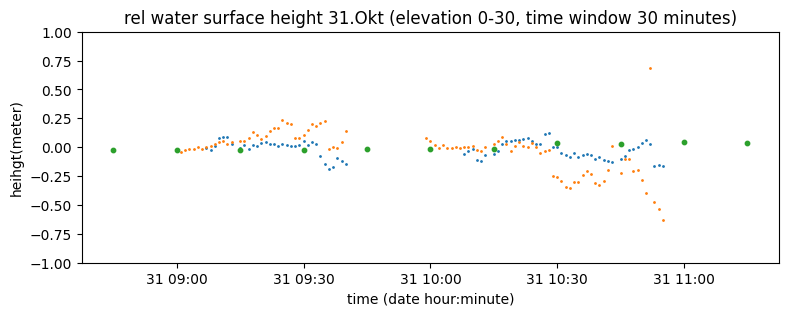

In [8]:
ts_1031_2 = ts_30_30_dict['1031_2']
ts_1031_3 = ts_30_30_dict['1031_3']
ts_gauge = pd.read_csv('../data/gauge/20221031_gauge.csv')

median_ts_2 = np.median(np.array(list(ts_1031_2.values())))
median_ts_3 = np.median(np.array(list(ts_1031_3.values())))

res_ts_1031_2 = -(np.array(list(ts_1031_2.values())) - median_ts_2)
res_ts_1031_3 = -(np.array(list(ts_1031_3.values())) - median_ts_3)

gauge_time = []
gauge_mean = np.mean(ts_gauge['1'])
res_ts_gauge = []
for t,h in zip(ts_gauge['0'],ts_gauge['1']):
    gauge_time.append(datetime.fromtimestamp(t,tz=timezone.utc))
    res_ts_gauge.append(h-gauge_mean)

date.append('1031')
median_2.append(median_ts_2)
median_3.append(median_ts_3)
diff_median.append(median_ts_2-median_ts_3)

plt.rcParams.update({'font.size': 10})
fig,ax = plt.subplots()
ax.scatter(list(ts_1031_2.keys()), res_ts_1031_2,s=1)
ax.scatter(list(ts_1031_3.keys()), res_ts_1031_3,s=1)
ax.scatter(gauge_time,res_ts_gauge,s=10)
ax.set_xlabel('time (date hour:minute)')
ax.set_ylabel('heihgt(meter)')
ax.set_title('rel water surface height 31.Okt (elevation 0-30, time window 30 minutes)')
ax.set_ylim([-1,1])
fig.set_size_inches(9,3)

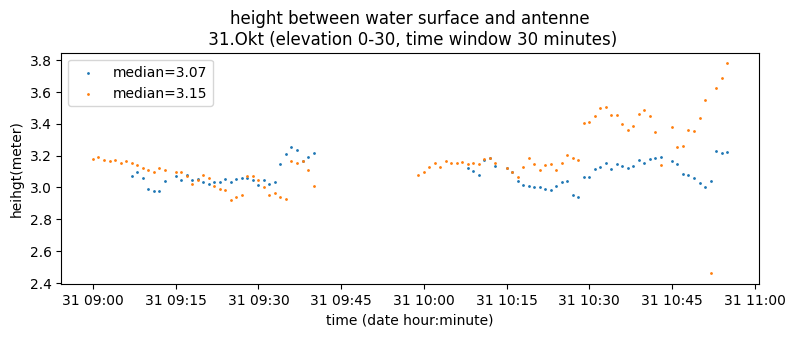

In [9]:
plt.rcParams.update({'font.size': 10})
fig,ax = plt.subplots()
ax.scatter(list(ts_1031_2.keys()), list(ts_1031_2.values()),s=1)
ax.scatter(list(ts_1031_3.keys()), list(ts_1031_3.values()),s=1)

ax.set_xlabel('time (date hour:minute)')
ax.set_ylabel('heihgt(meter)')
ax.set_title('height between water surface and antenne\n 31.Okt (elevation 0-30, time window 30 minutes)')
fig.set_size_inches(9,3)
ax.legend([f'median={round(median_ts_2,2)}',f'median={round(median_ts_3,2)}'])

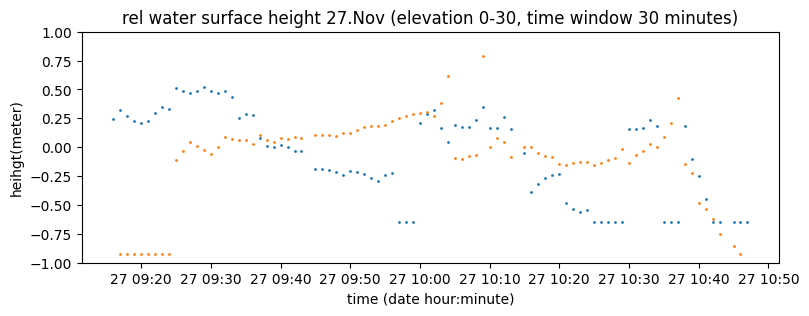

In [10]:
ts_1031_2 = ts_30_30_dict['1127_2']
ts_1031_3 = ts_30_30_dict['1127_3']
# ts_gauge = pd.read_csv('../data/gauge/20221127_gauge.csv')

median_ts_2 = np.median(np.array(list(ts_1031_2.values())))
median_ts_3 = np.median(np.array(list(ts_1031_3.values())))

res_ts_1031_2 = -(np.array(list(ts_1031_2.values())) - median_ts_2)
res_ts_1031_3 = -(np.array(list(ts_1031_3.values())) - median_ts_3)

'''gauge_time = []
gauge_mean = np.mean(ts_gauge['1'])
res_ts_gauge = []
for t,h in zip(ts_gauge['0'],ts_gauge['1']):
    gauge_time.append(datetime.fromtimestamp(t,tz=timezone.utc))
    res_ts_gauge.append(h-gauge_mean)'''

date.append('1127')
median_2.append(median_ts_2)
median_3.append(median_ts_3)
diff_median.append(median_ts_2-median_ts_3)

plt.rcParams.update({'font.size': 10})
fig,ax = plt.subplots()
ax.scatter(list(ts_1031_2.keys()), res_ts_1031_2,s=1)
ax.scatter(list(ts_1031_3.keys()), res_ts_1031_3,s=1)
# ax.scatter(gauge_time,res_ts_gauge,s=10)
ax.set_xlabel('time (date hour:minute)')
ax.set_ylabel('heihgt(meter)')
ax.set_title('rel water surface height 27.Nov (elevation 0-30, time window 30 minutes)')
ax.set_ylim([-1,1])
fig.set_size_inches(9,3)

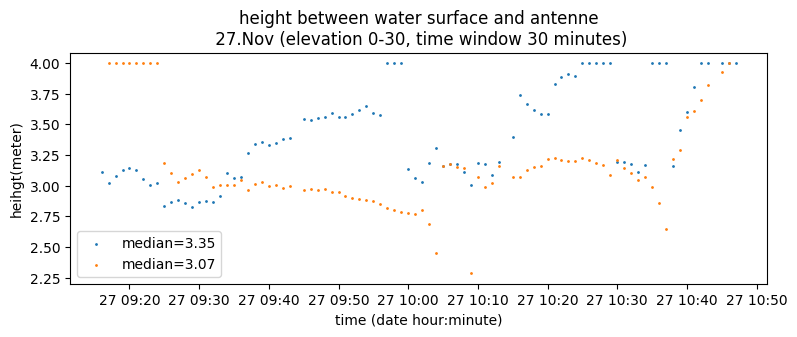

In [11]:
plt.rcParams.update({'font.size': 10})
fig,ax = plt.subplots()
ax.scatter(list(ts_1031_2.keys()), list(ts_1031_2.values()),s=1)
ax.scatter(list(ts_1031_3.keys()), list(ts_1031_3.values()),s=1)

ax.set_xlabel('time (date hour:minute)')
ax.set_ylabel('heihgt(meter)')
ax.set_title('height between water surface and antenne\n 27.Nov (elevation 0-30, time window 30 minutes)')
fig.set_size_inches(9,3)
ax.legend([f'median={round(median_ts_2,2)}',f'median={round(median_ts_3,2)}'])

In [13]:
df = pd.DataFrame({'date':date, 'median_2':median_2,'median_3':median_3,'diff median':diff_median})
with open('height_statistic.pkl', 'wb') as f:
    pickle.dump(df, f)


In [14]:
df

,date,median_2,median_3,diff median
0,0907,3.049,3.1975,-0.1485
1,1004,3.105,2.9320,0.1730
2,1031,3.066,3.1520,-0.0860
3,1127,3.351,3.0720,0.2790
